# Notebook 1: Data Cleaning and Preparation

## Objective:
- Load and inspect the dataset.
- Handle missing values, duplicates, and outliers.
- Normalize or standardize features as needed.
- Document all decisions made during the cleaning process.

## Steps:
1. Load the dataset and inspect its structure.
2. Handle missing or duplicate values.
3. Explore the presence of outliers.
4. Normalize or standardize features for further analysis.
5. Save the cleaned dataset for subsequent steps.


In [77]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
file_path = "../data/winequality-red.csv"  # Replace with your dataset path
df = pd.read_csv(file_path)

# Step 3: Initial dataset inspection
print("Dataset Head:")
display(df.head())

print("\nDataset Info:")
df.info()

print("\nSummary Statistics:")
display(df.describe())

# Document: Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

Dataset Head:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB

Summary Statistics:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000



Number of duplicate rows: 240


In [78]:
# Step 4: Check for missing and duplicates values

# If duplicates exist, drop them
if duplicate_count > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")


missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage)

Duplicates removed.

Percentage of Missing Values:
fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64


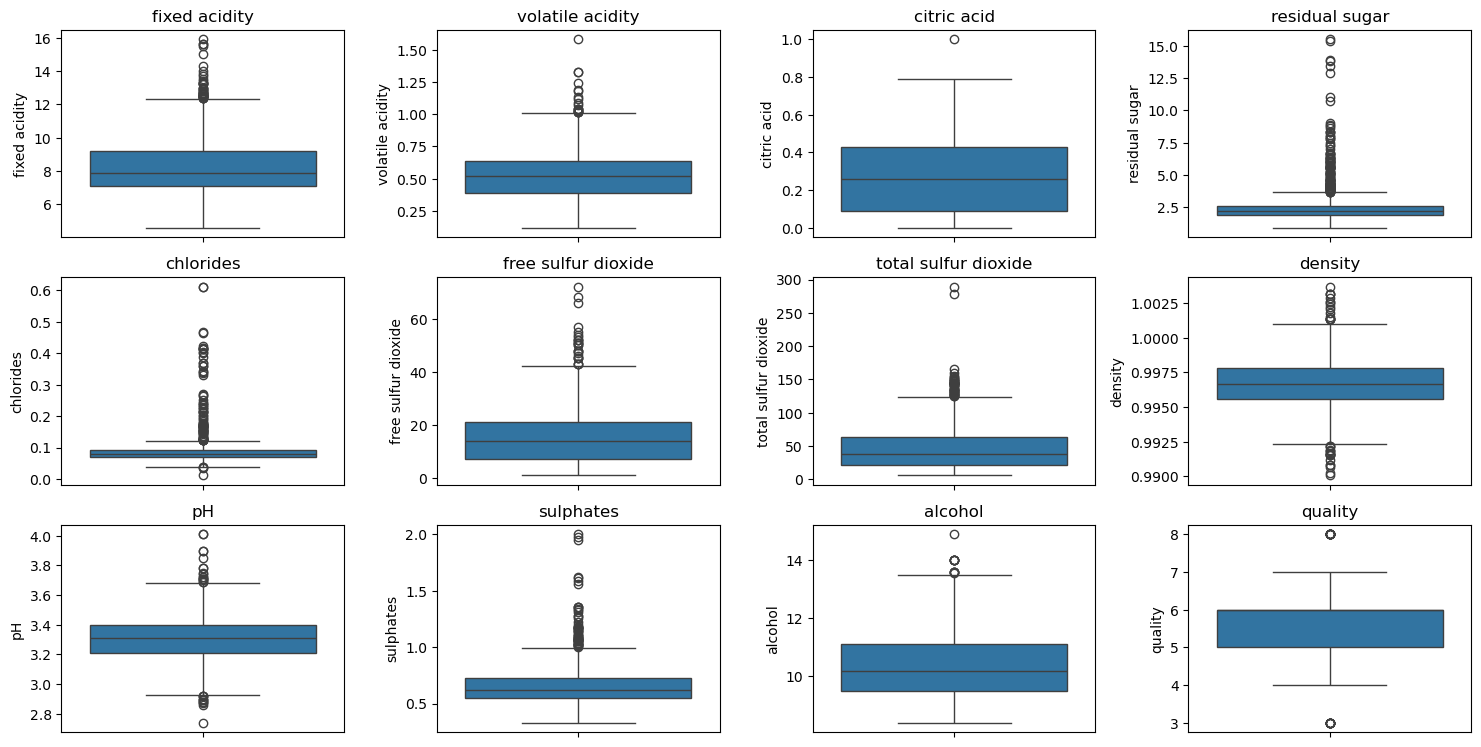

                      Percentage of Outliers (%)
Column                                          
residual sugar                              9.27
chlorides                                   6.40
sulphates                                   4.05
total sulfur dioxide                        3.31
fixed acidity                               3.02
density                                     2.58
pH                                          2.06
quality                                     1.99
free sulfur dioxide                         1.91
volatile acidity                            1.40
alcohol                                     0.88
citric acid                                 0.07


In [79]:
# Step 5: Outlier Detection
# Visualize distributions and detect outliers using boxplots
numeric_columns = df.select_dtypes(include=['float', 'int']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Calculate percentage of outliers in each column using Tukey's method (1.5 * IQR)
outlier_percentages = {}
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers_below = (df[col] < lower_bound).sum()
    outliers_above = (df[col] > upper_bound).sum()
    total_outliers = outliers_below + outliers_above
    
    # Calculate percentage of outliers
    outlier_percentage = (total_outliers / len(df)) * 100
    outlier_percentages[col] = round(outlier_percentage, 2)

# Display the percentage of outliers per column
outlier_percentages_df = pd.DataFrame(list(outlier_percentages.items()), columns=["Column", "Percentage of Outliers (%)"])
outlier_percentages_df = outlier_percentages_df.sort_values(by="Percentage of Outliers (%)", ascending=False).set_index("Column")

print(outlier_percentages_df)

### It has been decided to keep the outliers since, as can be seen, there are few of them and they seem to be relevant information. In the case of the column with the highest number of outliers ‘residual sugar’, it has also been decided to keep these outliers since 10% does not seem to be a large amount and if we look for the information in this column, we find that it says the following:

### "Typically, dry and off-dry wines will have a residual sugar level between 1 and 11 grams per liter (g/L) of residual sugar. Sweet wines will start around 35 g/L and then go up from there."

### The outliers values in this column fit perfectly into that description and will remain as such.

In [81]:
# Step 7: Save cleaned dataset for subsequent analysis
df.to_csv("../data/cleaned_dataset.csv", index=False)
print("Cleaned dataset saved as 'cleaned_dataset.csv'.")

Cleaned dataset saved as 'cleaned_dataset.csv'.
